In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%matplotlib inline
sns.set_style(style='whitegrid')

In [0]:
df = pd.read_csv('kc_house_data.csv')

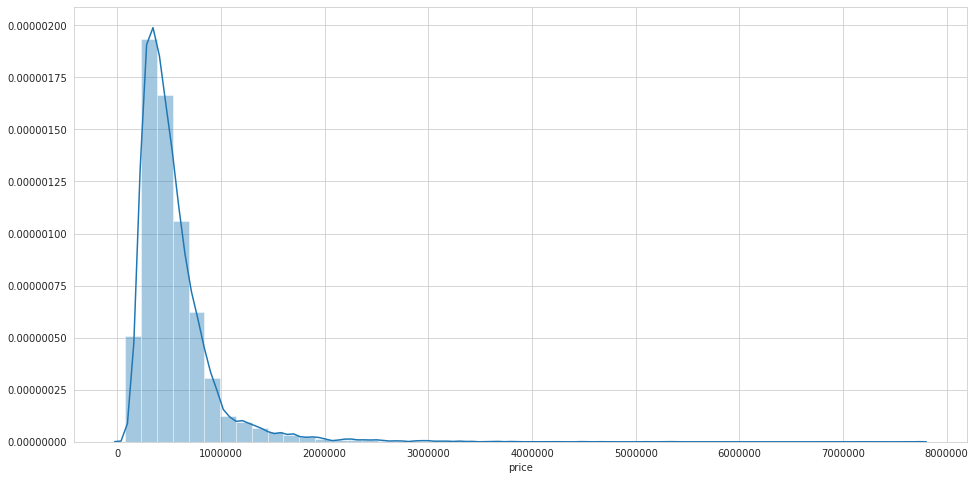

In [13]:
plt.figure(figsize=(16,8))
sns.distplot(df['price'])

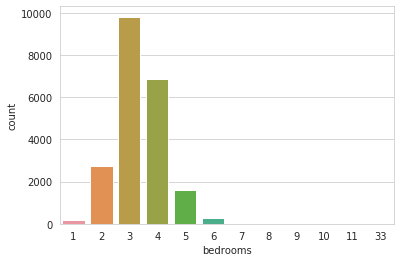

In [14]:
sns.countplot(df['bedrooms'])

In [16]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

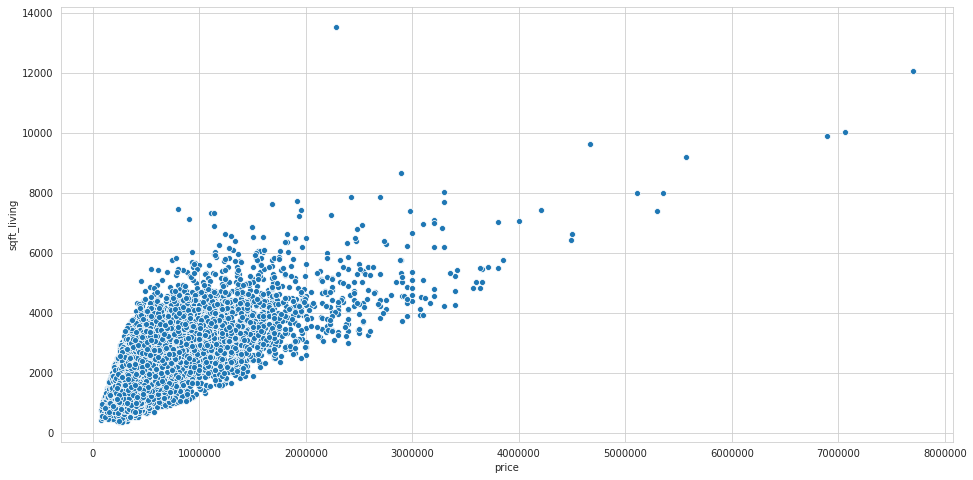

In [27]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='price', y='sqft_living', data=df)

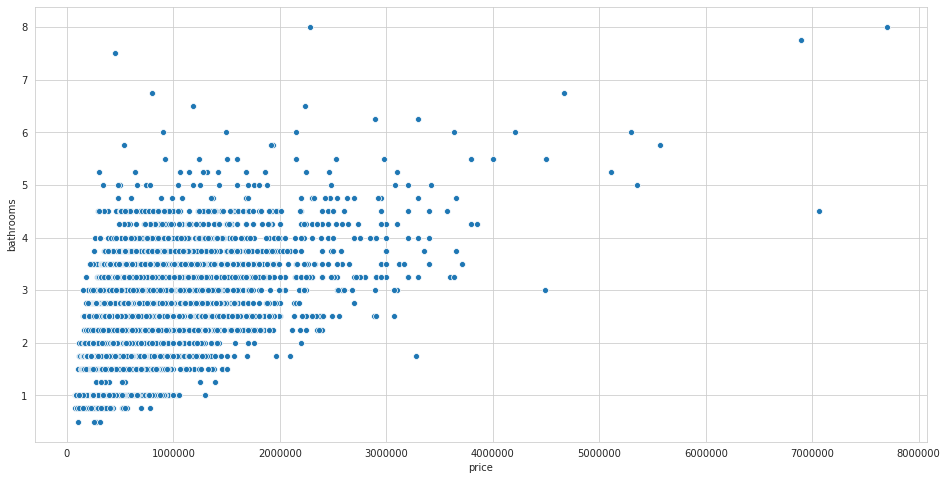

In [28]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='price', y='bathrooms', data=df)

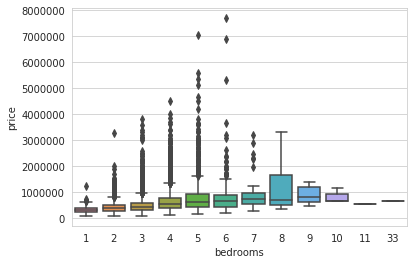

In [26]:
sns.boxplot(x='bedrooms', y='price', data=df)

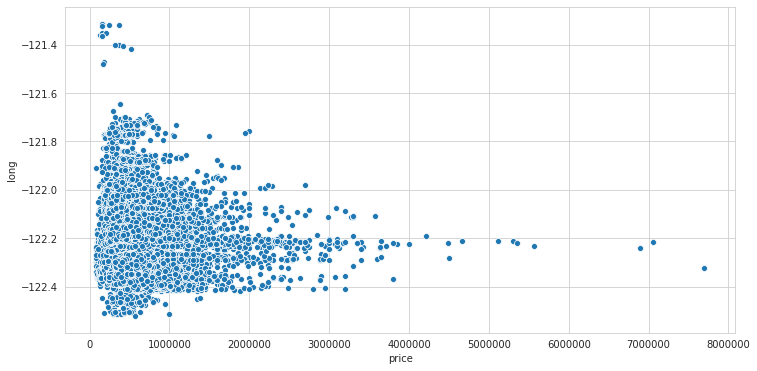

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price', y='long', data=df)

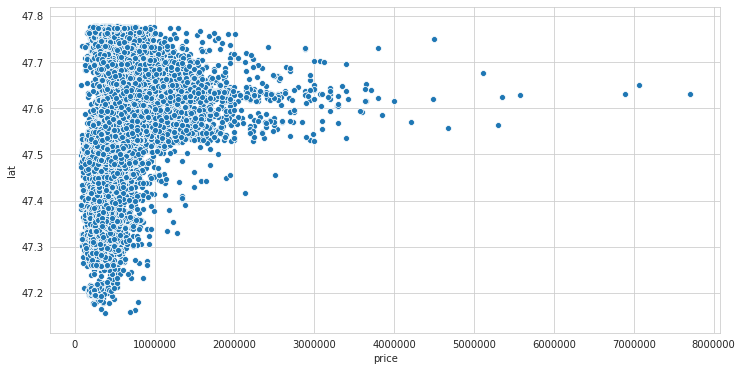

In [38]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='price', y='lat', data=df)

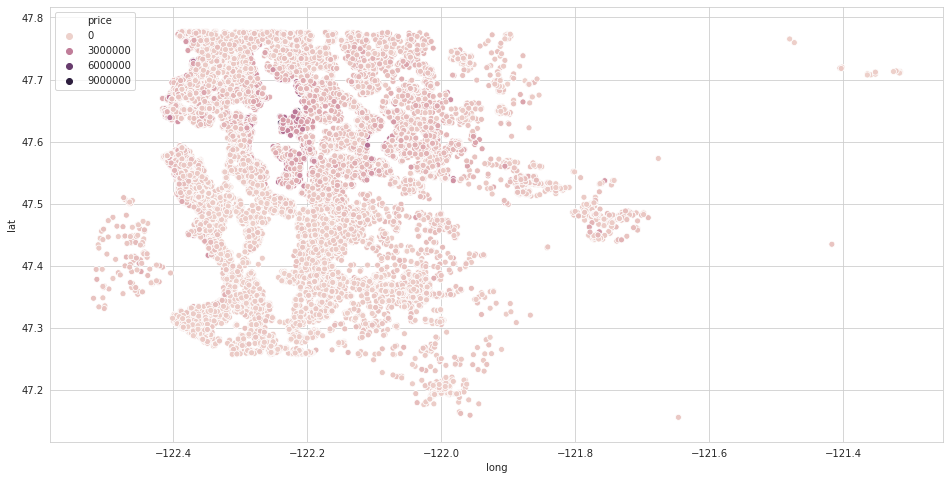

In [40]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

we can see tat it corresponds to a King County map

In [44]:
df.count()[0]*0.01

215.97

216 are the top 1% of expensive houses

In [0]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

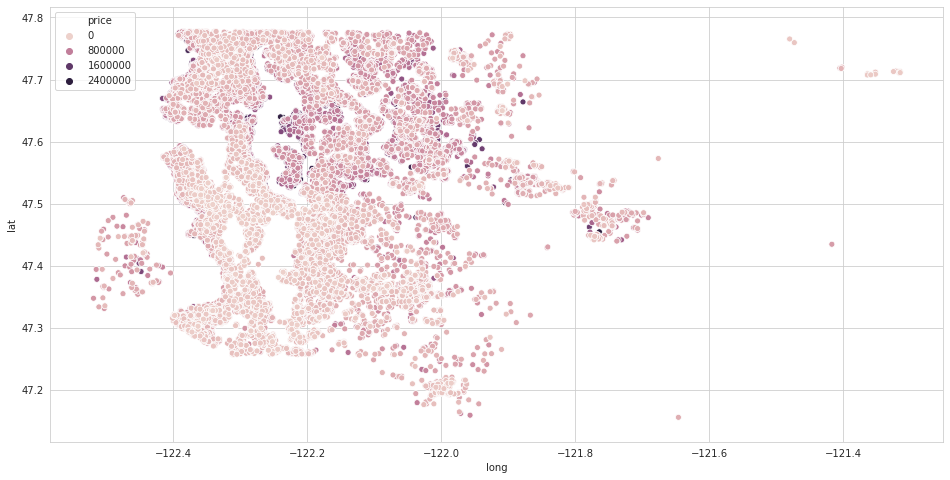

In [49]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, hue='price')

In [0]:
top_1_perc = df.sort_values('price', ascending=False).iloc[:216]

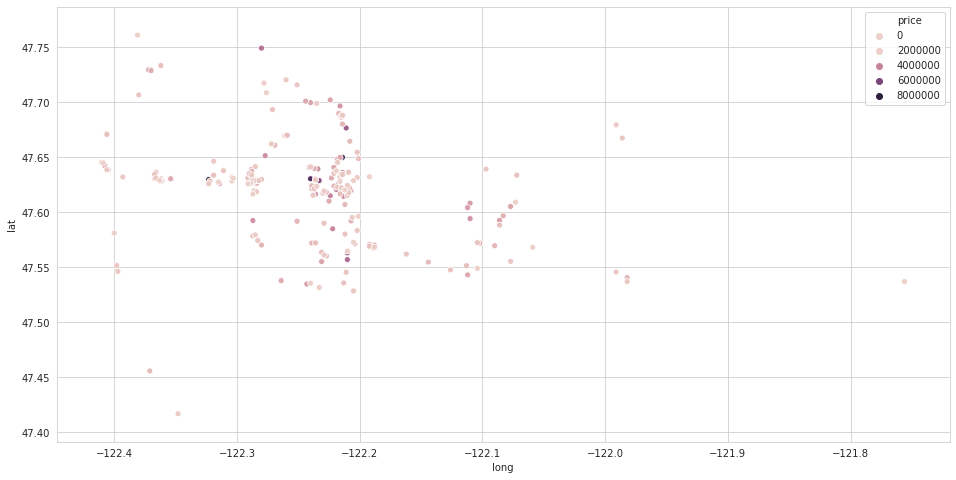

In [52]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='long', y='lat', data=top_1_perc, hue='price')

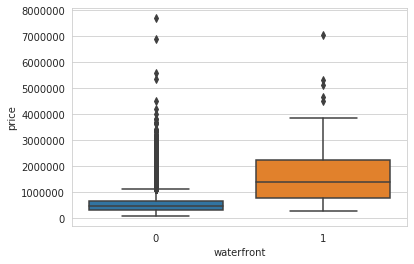

In [53]:
sns.boxplot(x='waterfront', y='price', data=df)

In [54]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
df = df.drop('id', axis=1)

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [57]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [0]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

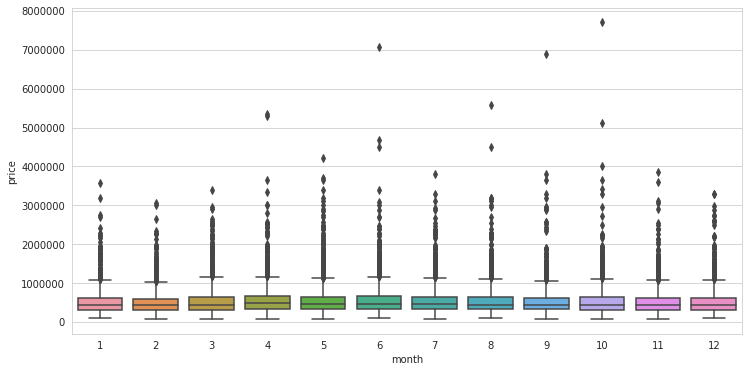

In [61]:
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='price', data=df)

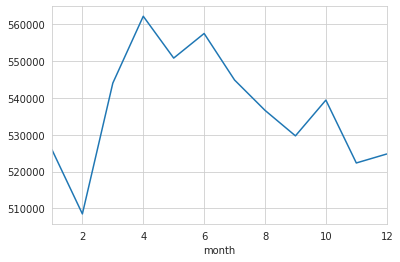

In [64]:
df.groupby('month').mean()['price'].plot()

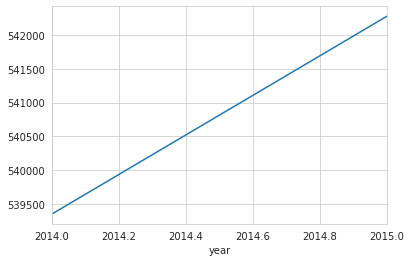

In [65]:
df.groupby('year').mean()['price'].plot()

In [0]:
df = df.drop('date', axis=1)

In [69]:
df.corr()['price'].sort_values()

zipcode         -0.053402
month           -0.009928
year             0.003727
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [0]:
df = df.drop('zipcode', axis=1)

In [0]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [94]:
X_train.shape

(15117, 19)

In [0]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [97]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), batch_size=128, epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 0s 22us/sample - loss: 252748007267.2536 - val_loss: 170432752500.9383
Epoch 2/400
15117/15117 [==============================] - 0s 20us/sample - loss: 131267591330.3687 - val_loss: 100206871094.3605
Epoch 3/400
15117/15117 [==============================] - 0s 20us/sample - loss: 100578036964.2104 - val_loss: 95665476473.9951
Epoch 4/400
15117/15117 [==============================] - 0s 21us/sample - loss: 98283487392.6753 - val_loss: 94177011090.0148
Epoch 5/400
15117/15117 [==============================] - 0s 20us/sample - loss: 96674188266.9334 - val_loss: 92717485321.4815
Epoch 6/400
15117/15117 [==============================] - 0s 20us/sample - loss: 95053490604.2416 - val_loss: 91170106077.2346
Epoch 7/400
15117/15117 [==============================] - 0s 20us/sample - loss: 93409712731.8193 - val_loss: 89543177759.6049
Epoch 8/400
15117/15117 [=========================

In [0]:
losses = pd.DataFrame(model.history.history)

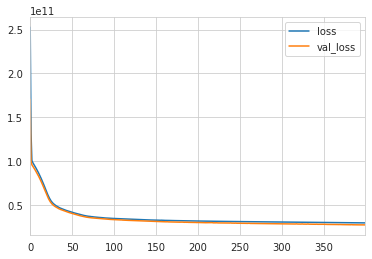

In [103]:
losses.plot()

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [0]:
predictions = model.predict(X_test)

In [107]:
print(np.sqrt(mean_squared_error(y_test,predictions)))
print(mean_absolute_error(y_test,predictions))

164278.73248637994
101813.30871793017


In [108]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [109]:
5.402966e+05

540296.6

In [110]:
explained_variance_score(y_test,predictions)

0.796889436783616

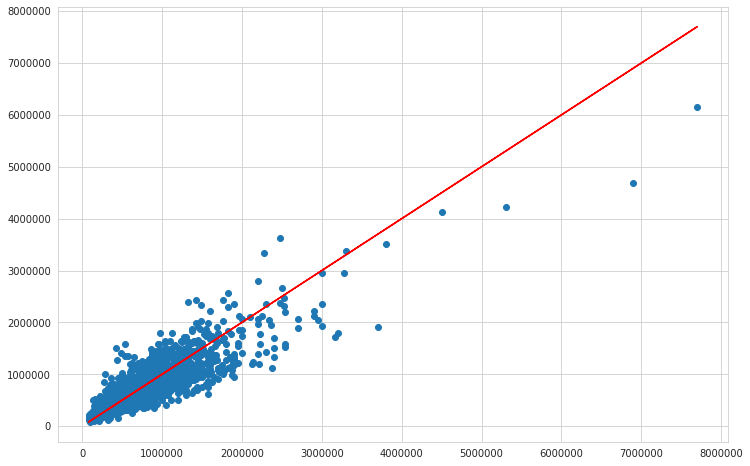

In [113]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test, 'r')